# Diamond Company Analytics Challenge

**Time:** 35 minutes

**Scenario:** You are the new data analyst at a prestigious diamond company. The CEO has called an urgent meeting and needs answers to critical business questions about the inventory.

**Your Mission:** Analyze the diamond inventory data and provide insights to guide strategic decisions.

In [31]:
import polars as pl

# Load the diamonds dataset
print("Loading diamonds dataset...")
df = pl.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/diamond.csv')
print("Dataset loaded successfully!")

Loading diamonds dataset...
Dataset loaded successfully!


## Section 1: Initial Inventory Assessment (5 minutes)

The CEO walks in: "Before we dive into specifics, I need to understand what we're working with. Give me the basics about our inventory database."

### Question 1: "How extensive is our inventory database?"

The CEO needs to know the scale of data you're analyzing.

In [32]:
df.height

6000

### Question 2: "What information do we track about each diamond?"

List all the characteristics we record.

In [33]:
df.head()

Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
f64,str,str,str,str,str,str,i64
1.1,"""Ideal""","""H""","""SI1""","""VG""","""EX""","""GIA""",5169
0.83,"""Ideal""","""H""","""VS1""","""ID""","""ID""","""AGSL""",3470
0.85,"""Ideal""","""H""","""SI1""","""EX""","""EX""","""GIA""",3183
0.91,"""Ideal""","""E""","""SI1""","""VG""","""VG""","""GIA""",4370
0.83,"""Ideal""","""G""","""SI1""","""EX""","""EX""","""GIA""",3171


### Question 3: "When I look at one line in this database, what am I looking at?"

Explain in business terms:

**Your answer:** Each row represents (Grain) a specific diamond and its characteristics.

## Section 2: Strategic Business Questions (20 minutes)

The CEO continues: "Now let's get to the important questions. Our board meeting is tomorrow and I need concrete numbers."

### Question 4: "We're considering expanding our storage facilities. How many total carats do we have in inventory? I need to know if our vaults can handle the weight."

Think about what measurement would help answer this.

In [34]:
total_carat_weight = df["Carat Weight"].sum()

print(f"Total carat weight: {total_carat_weight:,.2f}")

Total carat weight: 8,007.12


### Question 5: "Our new marketing campaign claims we have 'the widest variety of cuts in the industry.' Can you verify this?"

The CEO wants to know about variety, not quantity.

In [35]:
num_cuts = df["Cut"].n_unique()

print(f"We offer {num_cuts} different cuts.")

We offer 5 different cuts.


### Question 6: "I'm meeting with our insurance company. They need to know our price exposure - what's our most and least valuable diamond?"

In [36]:
min_price = df["Price"].min()
max_price = df["Price"].max()

print(f"Most valuable diamond: ${max_price:,.2f}")
print(f"Least valuable diamond: ${min_price:,.2f}")


Most valuable diamond: $101,561.00
Least valuable diamond: $2,184.00


### Question 7: "Which color grades should we focus on in our premium line? I need typical prices across our color spectrum."

The CEO wants to understand pricing patterns.

In [37]:
avg_price_per_color = (
    df.group_by("Color")
      .agg(pl.col("Price").mean().alias("avg_price"))
)

print(avg_price_per_color)


shape: (6, 2)
┌───────┬──────────────┐
│ Color ┆ avg_price    │
│ ---   ┆ ---          │
│ str   ┆ f64          │
╞═══════╪══════════════╡
│ H     ┆ 10487.347544 │
│ D     ┆ 15255.783661 │
│ I     ┆ 8989.636364  │
│ F     ┆ 12712.241856 │
│ G     ┆ 12520.050633 │
│ E     ┆ 11539.190231 │
└───────┴──────────────┘


Here is a visual to help contextualize price differences in relation to their color:

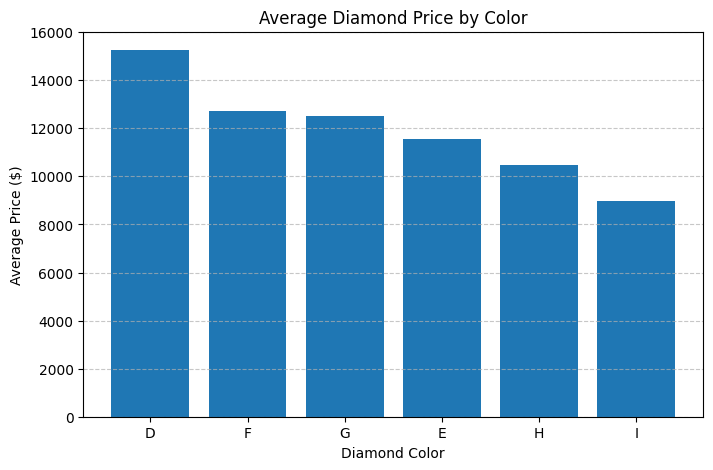

In [38]:
import matplotlib.pyplot as plt


# Group by color and get average price
avg_price_per_color = (
    df.group_by("Color")
      .agg(pl.col("Price").mean().alias("avg_price"))
      .sort("avg_price", descending=True)
)

# Extract data for plotting
colors = avg_price_per_color["Color"].to_list()
avg_prices = avg_price_per_color["avg_price"].to_list()

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(colors, avg_prices)
plt.xlabel("Diamond Color")
plt.ylabel("Average Price ($)")
plt.title("Average Diamond Price by Color")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Reflection:** After analyzing by color, how has your view of the data changed? What does each row in your result represent now?

**Your answer:** Now I am looking at the average of all diamonds in each category. New grain = Diamond color with average values across the board.

## Section 3: Advanced Strategic Analysis (10 minutes)

The CEO leans forward: "These next questions will shape our strategy for next year."

### Question 8: "We're thinking of specializing in certain clarity grades. For our investor deck, I need a complete breakdown showing: how many diamonds we have in each clarity grade, their typical price, and the total carats we're holding for each grade."

In [39]:
clarity_breakdown = (
    df.group_by("Clarity")
      .agg([
          pl.count().alias("num_diamonds"),
          pl.col("Price").mean().alias("avg_price"),
          pl.col("Carat Weight").sum().alias("total_carats")
      ])
      .sort("avg_price", descending=True)
)

print(clarity_breakdown)

shape: (7, 4)
┌─────────┬──────────────┬──────────────┬──────────────┐
│ Clarity ┆ num_diamonds ┆ avg_price    ┆ total_carats │
│ ---     ┆ ---          ┆ ---          ┆ ---          │
│ str     ┆ u32          ┆ f64          ┆ f64          │
╞═════════╪══════════════╪══════════════╪══════════════╡
│ FL      ┆ 4            ┆ 63776.0      ┆ 7.87         │
│ IF      ┆ 219          ┆ 22105.844749 ┆ 316.0        │
│ VVS1    ┆ 285          ┆ 16845.680702 ┆ 389.43       │
│ VVS2    ┆ 666          ┆ 14142.177177 ┆ 876.58       │
│ VS1     ┆ 1192         ┆ 13694.113255 ┆ 1682.74      │
│ VS2     ┆ 1575         ┆ 11809.053333 ┆ 2170.81      │
│ SI1     ┆ 2059         ┆ 8018.864012  ┆ 2563.69      │
└─────────┴──────────────┴──────────────┴──────────────┘


/tmp/ipython-input-3655239935.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("num_diamonds"),


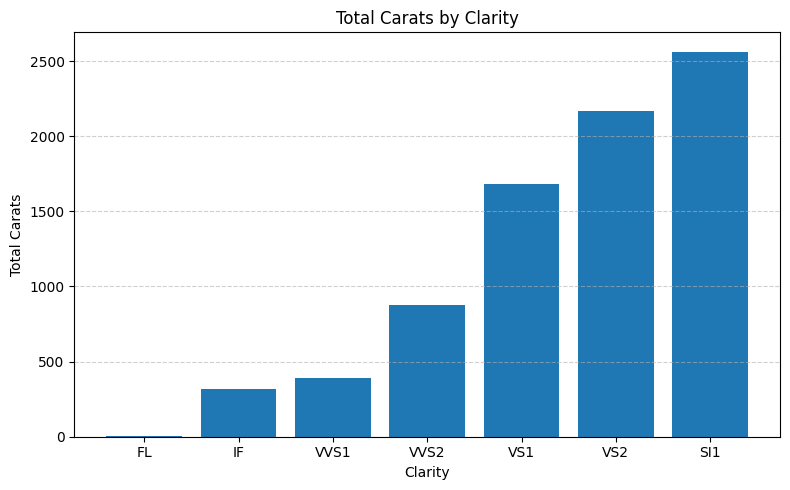

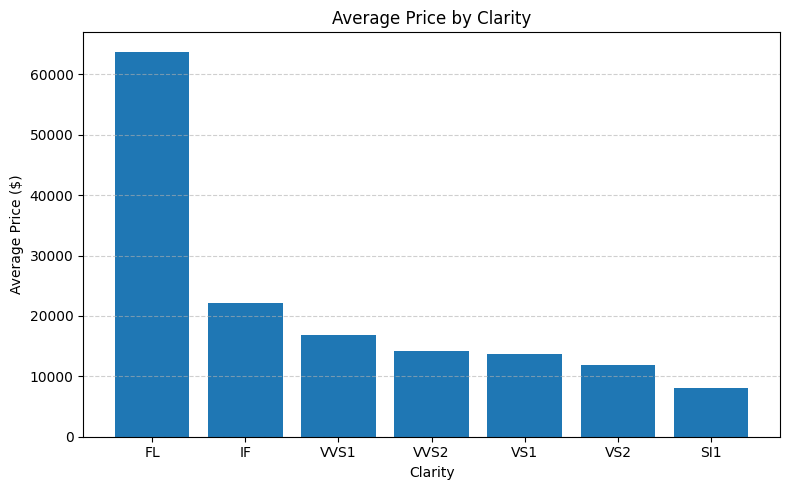

In [40]:
x = clarity_breakdown["Clarity"].to_list()
total_carats = clarity_breakdown["total_carats"].to_list()
avg_price = clarity_breakdown["avg_price"].to_list()

# Chart 1: Total Carats by Clarity (inventory mass)
plt.figure(figsize=(8,5))
plt.bar(x, total_carats)
plt.title("Total Carats by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Total Carats")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Chart 2: Average Price by Clarity (pricing power)
plt.figure(figsize=(8,5))
plt.bar(x, avg_price)
plt.title("Average Price by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Average Price ($)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Question 9: "My luxury competitor claims they have the best prices for every cut-color combination. Show me our pricing structure across these combinations - I want to see where we're competitive."

In [41]:
cut_color_prices = (
    df.group_by(["Cut", "Color"])
      .agg(pl.col("Price").mean().alias("avg_price"))
      .sort(["Cut", "Color"])
)

print(cut_color_prices)


shape: (30, 3)
┌───────────┬───────┬──────────────┐
│ Cut       ┆ Color ┆ avg_price    │
│ ---       ┆ ---   ┆ ---          │
│ str       ┆ str   ┆ f64          │
╞═══════════╪═══════╪══════════════╡
│ Fair      ┆ D     ┆ 6058.25      │
│ Fair      ┆ E     ┆ 5370.625     │
│ Fair      ┆ F     ┆ 6063.625     │
│ Fair      ┆ G     ┆ 7345.52381   │
│ Fair      ┆ H     ┆ 5908.5       │
│ …         ┆ …     ┆ …            │
│ Very Good ┆ E     ┆ 12101.910217 │
│ Very Good ┆ F     ┆ 12413.905495 │
│ Very Good ┆ G     ┆ 12354.013841 │
│ Very Good ┆ H     ┆ 10056.106132 │
│ Very Good ┆ I     ┆ 8930.031332  │
└───────────┴───────┴──────────────┘


**Reflection:** How specific is your analysis now? What level of detail does each row represent?

**Your answer:** Now our data output is much more specific. New grain = Cut and Color combination with the average stats for each combination to follow.

### Question 10: URGENT - "Our biggest client is interested in purchasing entire inventory segments. They asked: 'Which color-cut combinations represent your highest total inventory value?' Show me the top 5 most valuable inventory segments by total worth, and include how many diamonds are in each segment."

This is critical for tomorrow's negotiation.

In [42]:
segment_value = (
    df.group_by(["Cut", "Color"])
      .agg([
          pl.count().alias("num_diamonds"),
          pl.col("Price").sum().alias("total_value")
      ])
      .sort("total_value", descending=True)
      .head(5)
)
print(segment_value)

shape: (5, 4)
┌───────────┬───────┬──────────────┬─────────────┐
│ Cut       ┆ Color ┆ num_diamonds ┆ total_value │
│ ---       ┆ ---   ┆ ---          ┆ ---         │
│ str       ┆ str   ┆ u32          ┆ i64         │
╞═══════════╪═══════╪══════════════╪═════════════╡
│ Ideal     ┆ G     ┆ 690          ┆ 9363514     │
│ Very Good ┆ G     ┆ 578          ┆ 7140620     │
│ Very Good ┆ F     ┆ 455          ┆ 5648327     │
│ Ideal     ┆ F     ┆ 363          ┆ 5346782     │
│ Ideal     ┆ H     ┆ 458          ┆ 5279687     │
└───────────┴───────┴──────────────┴─────────────┘


/tmp/ipython-input-4248948920.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("num_diamonds"),


## Debrief

Congratulations! You've just completed your first day as the diamond company's data analyst.

Remember:
- CEOs speak in business language, not technical terms
- Always understand what each row represents before analyzing
- Business questions contain clues about which operations to use